There has been a lot of talk about "raping the vote pool." I've gone so far as to say that there are actual manifest Whale Wars going on, that we are in the Age of Warlords – an era dominated by tribal strife led by strong men.

But what does that look like?

Here's what I want to know: if I take all of the votes that involve one of the strongmen in question for the last week, what do they look like? What is the nature of the beast we so observe?

Basically, I get to play with pretty pictures!

## Cutting In

The first thing that we're going to need is access to the database in order to derive our voting patterns and access to our graphing systems but we can create the result.

Lucky for us, we have most of that code lying around in other notebooks.

In [1]:
# Setting up the imports for our basic query tools

from steemdata import SteemData
import datetime
from datetime import datetime as dt

from pprint import pprint

from collections import defaultdict as DD

In [2]:
# Init connection to database

db = SteemData()

In [3]:
# Let's put our account on interest here in a list. One day
#   we might want to generalize to more than one.

intL =['haejin']

In [4]:
# We want only the vote transactions which have happened
#   in the last week AND involve only our accounts of interest. 

query = {
    'type' : 'vote',
    'timestamp' : {'$gte': dt.now() - datetime.timedelta(days=7)},
    '$or': [{'author': {'$in': intL}}
#           {'voter': {'$in': intL}}] 
           ]}

proj = {'voter': 1, 'author': 1, 'weight': 1, '_id': 0}

In [5]:
%%time

result = db.Operations.find(query,
                            projection=proj)

voteHL = list(result)

Wall time: 1.4 s


In [6]:
len(voteHL)

29620

30,000 votes in the last week for which Haejin has been either the author or the target. That's pretty significant.

But I can see from the Robo RT window I have to do my probing database queries in that there are more than a few of those votes which are Haejin self voting. Now, I'm not against that kind of behavior – I encourage it if that's what you want to do – but I'm wondering how much of the activity in the last week is self voting.

In [7]:
matchCount = 0

for e in voteHL:
    if e['voter'] == e['author']:
        matchCount += 1
        
matchCount

88

Only just under 90 of those votes are self-voting, which comes as sort of a surprise to me, all told. For a guy accused of fiscal rape, he's terribly restrained. Well, 90 self-votes in two weeks is sort of self-involved.

So we have a good idea of what those votes contain. Is there anything more we can determine about the set?

## Throwing Spaghetti

Sure! We know that votes fall into two categories, especially in dealing with this set. There are positive votes and there are flags/negative votes.

I think it would be terribly interesting to get an idea of how many votes go which direction for Haejin. Remember, these are just from the last week.

In [8]:
from graphviz import Digraph

In [9]:
dot = Digraph(comment="Haejin Vote Relations", 
              format="jpg",
              engine="sfdp")

In [10]:
dot.attr('graph', overlap='false')
dot.attr('graph', ratio='auto')
dot.attr('graph', size='10000000,10000000')
dot.attr('graph', start='1.0')
dot.attr('graph', K='10')
dot.attr('graph', margin='5')

In [11]:
dot.attr('node', shape='square', 
         style='filled', color='black', 
         fillcolor='white')

In [12]:
# We'll add Haejin here right to the middle prominantly.

dot.node('haejin', 'haejin')

What we need here is to accumulate a list of edges, differentiating the ones which are up votes and the ones which are flags, because we will make them look different on the graph.

I'm sure that a lot of these votes involve differing posts, so it's probably in our best interest at this stage to build an accumulator which makes votes unique on a per transaction basis but gives them their cumulative vote value.

It's easier to do than to talk about.

In [13]:
# Initialize our accumulators to be zeros for uninitalized queries

upvotes = DD(int)
downvotes = DD(int)

In [14]:
for v in voteHL:
    
    # We'll just use this tuple as a key for ease
    VA = v['voter'], v['author']

    if not VA[0] == VA[1]:
        if v['weight'] >= 0:
            upvotes[VA] += v['weight']/100
        else:
            downvotes[VA] += (-v['weight'])/100

Ultimately, how many of each kind of vote are we talking about here? This is unified by voter/author, remember.

It should be considerably less than the 29,000 votes in total, but how much less?

In [15]:
len(upvotes.keys()), len(downvotes.keys())

(4181, 132)

That I was not expecting.

In the last week there have been 4200 individual entities which have uploaded Haejin's content and only 140-so individual entities that have flagged it. Considering how much bullshit has been thrown around online about how big a deal this is, I was expecting some bigger numbers.

Now that we have some content, however – let's get it onto a graph.

We're definitely going to want to work with some sort of measure of what our total accumulated up-and-down votes are, so let's calculate those.

In [16]:
totUpvotes = sum([upvotes[e] for e in upvotes.keys()])

totUpvotes

2356194.9499999993

In [17]:
totDownvotes = sum([downvotes[e] for e in downvotes.keys()])

totDownvotes

209664.91

When working with some of the early versions of this, I noticed something odd – there were people who had both voted up and flagged Haejin's content. That looked very strange, to put it mildly, so I thought it would be useful to mark those people on the graph in some way.

In the last week, there were 28.

In [18]:
# Everyone who's both upvoted and downvoted @haejin will get a bright warning box.

dot.attr('node', shape='rectangle', fontcolor='white', fillcolor='purple')

uvL = [e[0] for e in upvotes.keys()]

dvL = [e[0] for e in downvotes.keys()]

for e in dvL:
    if e in uvL:
        dot.node(e, e)

In [19]:
bothS = set()

for e in dvL:
    if e in uvL:
        bothS.add(e)
        
print(bothS, len(bothS))

{'danknugs', 'thesloth', 'randomthoughts', 'williamcrypt97', 'hendrix22', 'steemservices', 'method8', 'speakyourmind', 'youareyourowngod', 'berniesanders', 'thebotkiller', 'engagement', 'saea', 'anondelegate', 'dev1993', 'theyeti', 'teamnz', 'yougotflagged', 'the.bot', 'ngc', 'morten', 'ozchartart', 'rewardpoolrape', 'thecyclist', 'nextgencrypto', 'rudcharts', 'ghmboyan', 'moeknows'} 28


In [20]:
for v in bothS:
    print('Voter: @{:16}, Up: {:7.2f}, Down: {:9.2f}'.format(v, upvotes[(v, 'haejin')], 
                                                                downvotes[v, 'haejin']))

Voter: @danknugs        , Up:  125.00, Down:    364.00
Voter: @thesloth        , Up:  125.00, Down:    364.00
Voter: @randomthoughts  , Up:  125.00, Down:    364.00
Voter: @williamcrypt97  , Up:  200.00, Down:   4500.00
Voter: @hendrix22       , Up:    0.00, Down:  10304.00
Voter: @steemservices   , Up:  200.00, Down:    364.00
Voter: @method8         , Up:  200.00, Down:    100.00
Voter: @speakyourmind   , Up:  125.00, Down:    364.00
Voter: @youareyourowngod, Up:   75.00, Down:    100.00
Voter: @berniesanders   , Up:  125.00, Down:    364.00
Voter: @thebotkiller    , Up:  125.00, Down:    364.00
Voter: @engagement      , Up:  125.00, Down:    364.00
Voter: @saea            , Up:    0.00, Down:    100.00
Voter: @anondelegate    , Up:  100.00, Down:   1100.00
Voter: @dev1993         , Up:  300.00, Down:    100.00
Voter: @theyeti         , Up:  125.00, Down:    364.00
Voter: @teamnz          , Up:    0.00, Down:    100.00
Voter: @yougotflagged   , Up:  125.00, Down:    364.00
Voter: @th

This is an interesting list for a number of reasons.

Here I don't use the actual value of the vote to compare them. Instead, I use the accumulated percentage of the user's vote. That is, a 100 weight is equivalent to one full power vote, or 100 1% votes. For our consideration, it just doesn't matter (and calculating the value of a historical vote is a pain in the ass I don't need.)

Glancing down this list, something kind of amusing jumps out at me.

Bernie Sanders is on this list.

That's right, Bernie Sanders issued at least one up vote to Haejin in the last week. In fact, he had to issue more than one because there is 125% accumulated value and only 364% down voting.

What in the world did Bernie Sanders vote up by Haejin? Let's deal with that question a little bit later. For now, let's build the rest of the graph.

In [21]:
# Everyone upvoting Haelin will get to be blue.

dot.attr('node', shape='oval', fontcolor='black', fillcolor='lightblue')

In [22]:
u = Digraph(name='Upvotes')

for v in upvotes.keys():
    u.edge(v[0], v[1], 
             color = 'green', 
             fontcolor = 'black',
             len = str( ((totUpvotes / (upvotes[v]+0.0001)) + 1) * 100 ),
             taillabel = str(upvotes[v]))
    
dot.subgraph(u)

In [23]:
# Everyone downvoting Haelin will get to be yellow.

dot.attr('node', shape='oval', fillcolor='yellow')

In [24]:
d = Digraph(name='Downvotes')

for v in downvotes.keys():
    d.edge(v[0], v[1],
            color = 'red',
            fontcolor = 'red',
            len = str( ((totDownvotes / (downvotes[v]+0.0001)) + 1) * 100 ),
            taillabel = str(downvotes[v]))
    
dot.subgraph(d)

In [25]:
%time dot.render('haejinVotesWeek', view=True)

Wall time: 31.9 s


'haejinVotesWeek.jpg'

In [26]:
dot

And there it is.

Up votes for Haejin in the last week are green, down votes are red. Originally, I had all of Haejin's votes in here as well – but since everything that wasn't a down vote was a self vote, and all the down votes were for people that had down voted him, it seemed more sensible just to remove those in the first place. As a result, all of this activity are people engaging with Haejin.

You will notice the yellow cluster at the bottom made up of all of the people who have down voted Haejin's content and that the purple group to the northeast made up of people who have both flagged and up voted.

Keep in mind, this is just the activity from the last seven days.

If you look very closely (very closely), you'll note that beside each of the arrows coming away from one of the nodes is a red number or a black number (or both). These numbers represent the accumulated percentage of vote weights from each node. The vast majority of these? 100%. Interestingly, that suggests that most people who support Haejin give roughly one full 100% vote a week.

We have no idea how many of the entities represented here are bots. We have no way of even getting the slightest hint of the answer to that question, even though it would be really good to know. But it's safe to say that whatever flagging activity is going on, unless those in the yellow ovals are some serious whales, it can't be too effective.

## But What About ... ?

But what about those up votes from accounts who had also flagged?

That's a good damn question.

Let's do another query and find out what those particular up votes were for.

In [27]:
# Init connection to database

db = SteemData()

In [28]:
# Let's put our account on interest here in a list. One day
#   we might want to generalize to more than one.

intL =['haejin']

In [29]:
# We want only the vote transactions which have happened
#   in the last week AND involve only our accounts of interest. 

query = {
    'type' : 'vote',
    'timestamp' : {'$gte': dt.now() - datetime.timedelta(days=7)},
    'author': 'haejin',
    'voter': 'berniesanders',
    'weight': {'$gte': 0}}

proj = {'weight': 1, 'permlink': 1, '_id': 0}

# sort = ('timestamp', -1)

In [30]:
%%time

result = db.Operations.find(query,
                            projection=proj)

voteBSL = list(result)

Wall time: 300 ms


In [31]:
len(voteBSL)

3

Wait, that's 3 up votes from Bernie Sanders to Haejin in the last week.

What in *the world* is he up voting?

In [32]:
for v in voteBSL:
    print('Weight: {:>5.1f}, http://steemit.com/@haejin/{}\n'.format(v['weight']/100, 
                                                                     v['permlink']))

Weight:  50.0, http://steemit.com/@haejin/bitcoin-btc-evening-update-five-waves-abc

Weight:  50.0, http://steemit.com/@haejin/wabi-one-more-smaller-lower-low

Weight:  25.0, http://steemit.com/@haejin/districtox-dnt-fractals-point-higher-post-correction



That -- doesn't look different from the usual run of Haejin content at all. Not a bit.

So why do these up votes exist?

Okay, let's extend the scope of our vierw a bit. Let's look back a good, solid *90 days.* That's a pretty hefty timeline of stuff to accumulate and examine. Surely if there's a pattern of behaviour, we'll see it there, right?

In [33]:
# Init connection to database

db = SteemData()

In [34]:
intL =['haejin']

# We want only the vote transactions which have happened
#   in the last week AND involve only our accounts of interest. 

query = {
    'type' : 'vote',
    'timestamp' : {'$gte': dt.now() - datetime.timedelta(days=90)},
    'author': 'haejin',
    'voter': 'berniesanders',
    'weight': {'$gte': 0}}

proj = {'weight': 1, 'permlink': 1, '_id': 0}

# sort = ('timestamp', -1)

In [35]:
%%time

result = db.Operations.find(query,
                            projection=proj)

voteBSL = list(result)

Wall time: 2.41 s


In [36]:
len(voteBSL)

7

*7?*

Bernie Sanders has upvoted Haejin 7 times in the last three months. Okay, I'm game, what has he been voting up and how much?

In [37]:
for v in voteBSL:
    print('Weight: {:>5.1f}, http://steemit.com/@haejin/{}\n'.format(v['weight']/100, 
                                                                     v['permlink']))

Weight:   0.0, http://steemit.com/@haejin/delegate-your-steem-power-to-haejin-here-is-an-easy-way-to-do-this

Weight:   0.0, http://steemit.com/@haejin/haejin-exceeds-10-000-followers-this-proves-people-follow-for-good-content-not-bad-content

Weight:   0.0, http://steemit.com/@haejin/bitcoin-btc-morning-update-correction-bottom-date-projections

Weight:   0.0, http://steemit.com/@haejin/bitcoin-btc-morning-update-awareness-of-big-picture-keeps-the-panic-away

Weight:  50.0, http://steemit.com/@haejin/bitcoin-btc-evening-update-five-waves-abc

Weight:  50.0, http://steemit.com/@haejin/wabi-one-more-smaller-lower-low

Weight:  25.0, http://steemit.com/@haejin/districtox-dnt-fractals-point-higher-post-correction



That doesn't make any sense. I mean that rather literally. 

In the last three months, Bernie has up voted three of Haejin's posts. Before *this week,* those up votes were dust votes for things which make little sense but at least didn't carry any real value. They might even be dust flags.

Until literally this week.

Out of curiosity, let's use exactly the same code to derive flags from Bernie to Haejin from Bernie's account.

In [38]:
# Init connection to database

db = SteemData()

In [39]:
intL =['haejin']

# We want only the vote transactions which have happened
#   in the last week AND involve only our accounts of interest. 

query = {
    'type' : 'vote',
    'timestamp' : {'$gte': dt.now() - datetime.timedelta(days=90)},
    'author': 'haejin',
    'voter': 'berniesanders',
    'weight': {'$lte': 0}}

proj = {'weight': 1, 'permlink': 1, '_id': 0}

sort = [('weight', 1)]

In [40]:
%%time

result = db.Operations.find(query,
                            projection=proj,
                            sort=sort)

voteBSL = list(result)

Wall time: 1.2 s


In [41]:
len(voteBSL)

212

In [42]:
for v in voteBSL:
    print('Weight: {:>5.1f}, http://steemit.com/@haejin/{}\n'.format(v['weight']/100, 
                                                                     v['permlink']))

Weight: -100.0, http://steemit.com/@haejin/bitcoin-btc-evening-update-a-pregnant-bullish-ascending-right-triangle-check-out-these-charts

Weight: -100.0, http://steemit.com/@haejin/ripple-xrp-bullish-explosion-out-of-an-a-b-c-d-e-triangle-what-does-this-mean-see-this-analysis

Weight: -100.0, http://steemit.com/@haejin/litecoin-ltc-revised-target-usd501

Weight: -100.0, http://steemit.com/@haejin/why-bitcoin-btc-is-not-topping

Weight: -100.0, http://steemit.com/@haejin/black-coin-analysis-the-basin-of-black-gold

Weight: -100.0, http://steemit.com/@haejin/mana-from-heaven

Weight: -100.0, http://steemit.com/@haejin/litecoin-ltc-revised-target-usd632-here-is-the-analysis-as-to-why

Weight: -100.0, http://steemit.com/@haejin/bitshares-bts-usd1-60-anyone

Weight: -100.0, http://steemit.com/@haejin/tierion-tnt-analysis-a-gift-horse-cometh-bearing-gifts-of-profits-profits-and-profits

Weight: -100.0, http://steemit.com/@haejin/elastic-xel-confluence-of-a-bull-storm-is-raging

Weight: -100.

Only 212 flags in the last 90 days and they don't appear to be any different in terms of behavior, though there are a surprising number of them which are less than 100% votes. Particularly given the vehemence with which Bernie denounces and antagonizes Haejin publicly.

You know, what th'Hell. Let's look at a picture of the other side of this.

## Feel the Bern

That pun was going to happen whether you like it or not.

Let's run through exactly the same code that we used when looking at Haejin's interactions. Upfront, let's be clear – I am perfectly aware that Bernie makes heavy use of automation and distributing the SP that he has access to across multiple accounts, meaning that locality means very little in terms of interaction on the blockchain when we are talking about him. I know this upfront, but for the sake of having a place to start, let's take this as our place to start.

In [43]:
# Init connection to database

db = SteemData()

In [45]:
# Let's put our account on interest here in a list. One day
#   we might want to generalize to more than one.

intL =['berniesanders']

# We want only the vote transactions which have happened
#   in the last week AND involve only our accounts of interest. 

query = {
    'type' : 'vote',
    'timestamp' : {'$gte': dt.now() - datetime.timedelta(days=7)},
    '$or': [{'author': {'$in': intL}}
#           {'voter': {'$in': intL}}] 
           ]}

proj = {'voter': 1, 'author': 1, 'weight': 1, '_id': 0}

In [45]:
%%time

result = db.Operations.find(query,
                            projection=proj)

voteBL = list(result)

In [47]:
len(voteBL)

3423

Already we've run into a significant difference. Where Haejin had nearly 30,000 votes one way or another in the last week, Bernie is only showing shy of 3500. That's an order of magnitude difference.

In [48]:
matchCount = 0

for e in voteBL:
    if e['voter'] == e['author']:
        matchCount += 1
        
matchCount

58

Something that's not all that different is the absolute number of self votes that both Bernie and Haejin show. Haejin has 88, Bernie has 58 – but they have vastly different amounts of SP and a whole different method of existence.

That's a lot of SP involved with self voting for somebody who calls out self voting as "raping the rewards pool."

Just saying.

In [49]:
dot = Digraph(comment="Bernie Vote Relations", 
              format="jpg",
              engine="sfdp")

In [50]:
dot.attr('graph', overlap='false')
dot.attr('graph', ratio='auto')
dot.attr('graph', size='10000000,10000000')
dot.attr('graph', start='1.0')
dot.attr('graph', K='10')
dot.attr('graph', margin='5')

In [51]:
dot.attr('node', shape='square', 
         style='filled', color='black', 
         fillcolor='white')

In [52]:
# We'll add Haejin here right to the middle prominantly.

dot.node('berniesanders', 'berniesanders')

In [53]:
# Initialize our accumulators to be zeros for uninitalized queries

upvotes = DD(int)
downvotes = DD(int)

In [54]:
for v in voteBL:
    
    # We'll just use this tuple as a key for ease
    VA = v['voter'], v['author']

    if not VA[0] == VA[1]:
        if v['weight'] >= 0:
            upvotes[VA] += v['weight']/100
        else:
            downvotes[VA] += (-v['weight'])/100

In [55]:
len(upvotes.keys()), len(downvotes.keys())

(759, 30)

In terms of overall interaction counts, the comparison continues to be somewhat strange and therefore interesting.

The number of different accounts involved in up voting Bernie is 800 while the number involved in flanking him is 30. In relative terms, Haejin has 3.1% of the unique voting accounts in the last week being flags while Bernie has 3.9% of the unique voting accounts in the last week targeting him being flags.

Again, not really all that different.

In [56]:
totUpvotes = sum([upvotes[e] for e in upvotes.keys()])

totUpvotes

241597.47999999998

In [57]:
totDownvotes = sum([downvotes[e] for e in downvotes.keys()])

totDownvotes

5623.0

In [58]:
# Everyone who's both upvoted and downvoted @haejin will get a bright warning box.

dot.attr('node', shape='rectangle', fontcolor='white', fillcolor='purple')

uvL = [e[0] for e in upvotes.keys()]

dvL = [e[0] for e in downvotes.keys()]

for e in dvL:
    if e in uvL:
        dot.node(e, e)

In [59]:
bothS = set()

for e in dvL:
    if e in uvL:
        bothS.add(e)
        
print(bothS, len(bothS))

{'qubes', 'morten', 'btu', 'ihsan19', 'jo3potato', 'voicefromfaraway', 'bcc'} 7


In [60]:
for v in bothS:
    print('Voter: @{:16}, Up: {:7.2f}, Down: {:7.2f}'.format(v, upvotes[(v, 'berniesanders')], 
                                                                downvotes[v, 'berniesanders']))

Voter: @qubes           , Up:  200.00, Down:  300.00
Voter: @morten          , Up:  100.00, Down:  100.00
Voter: @btu             , Up:   14.00, Down:  400.00
Voter: @ihsan19         , Up:    0.00, Down:  100.00
Voter: @jo3potato       , Up:    0.00, Down:  100.00
Voter: @voicefromfaraway, Up:    0.00, Down:  100.00
Voter: @bcc             , Up:  200.00, Down:  431.00


Taking a look at the accounts that occur in both the up vote and flag lists, we find several, just as we did looking at the Haejin interactions.

If we're being strict, we can throw out the ones that show an up vote amount of zero. Those could just as easily be a dust amount of down vote; it's impossible to tell given the internal representation of valuation on the steem blockchain as it stands.

That still leaves some interesting results. In particular, @morten appears on the overlap list for both Haejin and Bernie. He clearly dislikes Haejin more, but at least in terms of this particular week long examination, there appears to be some minor schizophrenia.

Something that troubles me about both of these lists (and the overall valuation of a lot of these voting percentages across the board) is that they come out to be very round numbers. That wouldn't be strange if Bernie and Haejin posted at a frequency which was consistently a multiple of five during the week, but that seems a little strange. In particular, we know that's not the case for Haejin.

Something about these numbers seems a little off and I can't put my finger on it. They are consistent in strange ways where I would not expect that kind of consistency.

In [61]:
# Everyone upvoting Haelin will get to be blue.

dot.attr('node', shape='oval', fontcolor='black', fillcolor='lightblue')

In [62]:
u = Digraph(name='Upvotes')

for v in upvotes.keys():
    u.edge(v[0], v[1], 
             color = 'green', 
             fontcolor = 'black',
             len = str( ((totUpvotes / (upvotes[v]+0.0001)) + 1) * 100 ),
             taillabel = str(upvotes[v]))
    
dot.subgraph(u)

In [63]:
# Everyone downvoting Haelin will get to be yellow.

dot.attr('node', shape='oval', fillcolor='yellow')

In [64]:
d = Digraph(name='Downvotes')

for v in downvotes.keys():
    d.edge(v[0], v[1],
            color = 'red',
            fontcolor = 'red',
            len = str( ((totDownvotes / (downvotes[v]+0.0001)) + 1) * 100 ),
            taillabel = str(downvotes[v]))
    
dot.subgraph(d)

In [65]:
%time dot.render('bernieVotesWeek', view=True)

Wall time: 2.56 s


'bernieVotesWeek.jpg'

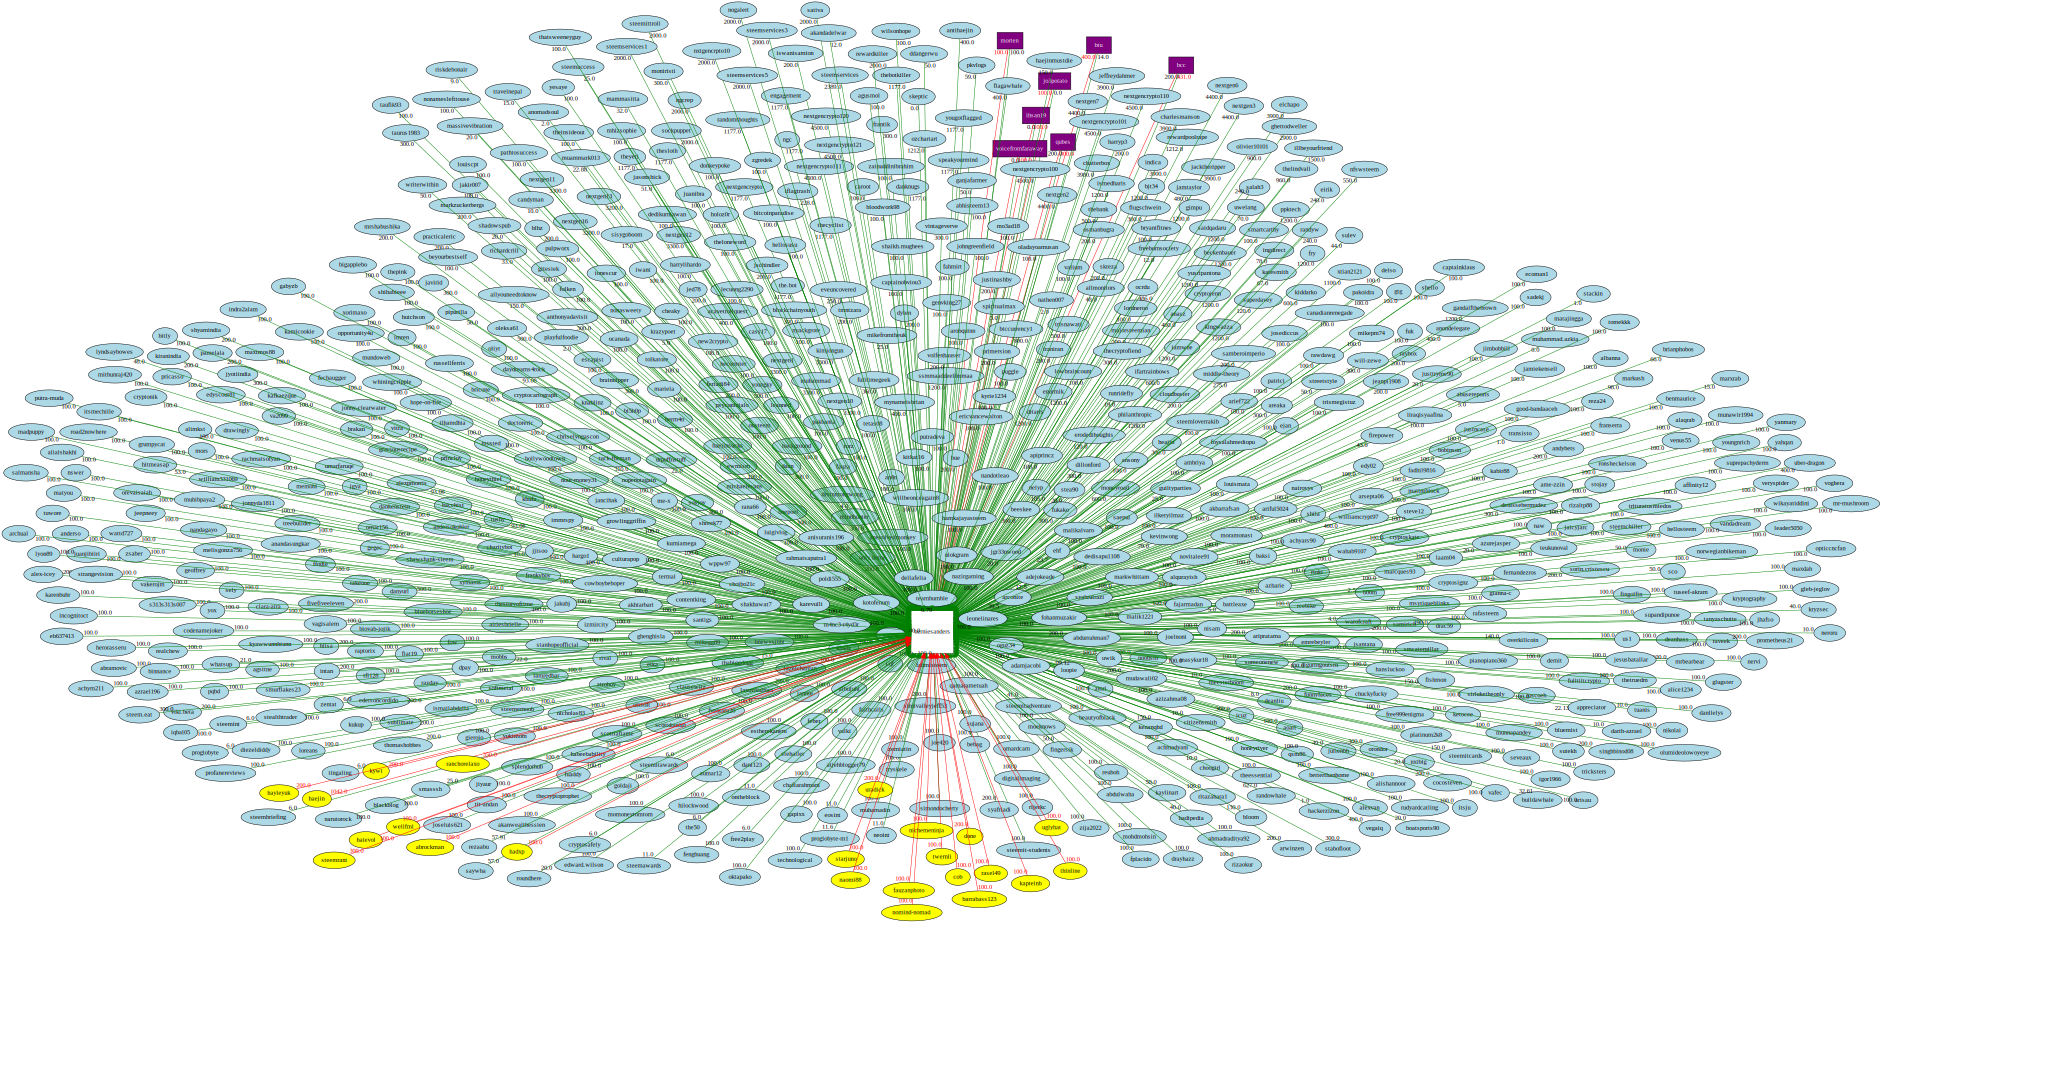

In [66]:
dot

Obviously Bernie's graph is considerably smaller. There is almost an order of magnitude fewer edges to display, which makes it a lot easier.

Overall, though – we see the same sort of general shape. About the same amount of area is taken up by people who flag. The overlap list may be somewhat smaller in terms of percentage for Bernie but it's comparable.

From a relationship map point of view, there's a lot more in common here than there is different.

## Squid in a Box

Because it's sensible and because we need some sort of baseline – even if it's a ridiculous baseline, I'm going to subject my own account to the exact same code analysis that I just used on Haejin and Bernie.

I won't recap the discussion unless something interesting comes up, so I'll see you on the other side.

In [71]:
# Init connection to database

db = SteemData()

In [72]:
# Let's put our account on interest here in a list. One day
#   we might want to generalize to more than one.

intL =['lextenebris']

# We want only the vote transactions which have happened
#   in the last week AND involve only our accounts of interest. 

query = {
    'type' : 'vote',
    'timestamp' : {'$gte': dt.now() - datetime.timedelta(days=7)},
    '$or': [{'author': {'$in': intL}}
#           {'voter': {'$in': intL}}] 
           ]}

proj = {'voter': 1, 'author': 1, 'weight': 1, '_id': 0}

In [73]:
%%time

result = db.Operations.find(query,
                            projection=proj)

voteLL = list(result)

Wall time: 215 ms


In [74]:
len(voteLL)

179

In [75]:
matchCount = 0

for e in voteLL:
    if e['voter'] == e['author']:
        matchCount += 1
        
matchCount

14

In [76]:
dot = Digraph(comment="Lex Vote Relations", 
              format="jpg",
              engine="sfdp")

In [77]:
dot.attr('graph', overlap='false')
dot.attr('graph', ratio='auto')
dot.attr('graph', size='10000000,10000000')
dot.attr('graph', start='1.0')
dot.attr('graph', K='10')
dot.attr('graph', margin='5')

In [78]:
dot.attr('node', shape='square', 
         style='filled', color='black', 
         fillcolor='white')

In [79]:
# We'll add Haejin here right to the middle prominantly.

dot.node('lextenebris', 'lextenebris')

In [80]:
# Initialize our accumulators to be zeros for uninitalized queries

upvotes = DD(int)
downvotes = DD(int)

In [81]:
for v in voteLL:
    
    # We'll just use this tuple as a key for ease
    VA = v['voter'], v['author']

    if not VA[0] == VA[1]:
        if v['weight'] >= 0:
            upvotes[VA] += v['weight']/100
        else:
            downvotes[VA] += (-v['weight'])/100

In [82]:
len(upvotes.keys()), len(downvotes.keys())

(78, 0)

In [83]:
totUpvotes = sum([upvotes[e] for e in upvotes.keys()])

totUpvotes

13393.6

In [84]:
totDownvotes = sum([downvotes[e] for e in downvotes.keys()])

totDownvotes

0

In [85]:
# Everyone who's both upvoted and downvoted @haejin will get a bright warning box.

dot.attr('node', shape='rectangle', fontcolor='white', fillcolor='purple')

uvL = [e[0] for e in upvotes.keys()]

dvL = [e[0] for e in downvotes.keys()]

for e in dvL:
    if e in uvL:
        dot.node(e, e)

In [86]:
bothS = set()

for e in dvL:
    if e in uvL:
        bothS.add(e)
        
print(bothS, len(bothS))

set() 0


In [87]:
for v in bothS:
    print('Voter: @{:16}, Up: {:7.2f}, Down: {:7.2f}'.format(v, upvotes[(v, 'berniesanders')], 
                                                                downvotes[v, 'berniesanders']))

In [88]:
# Everyone upvoting Haelin will get to be blue.

dot.attr('node', shape='oval', fontcolor='black', fillcolor='lightblue')

In [89]:
u = Digraph(name='Upvotes')

for v in upvotes.keys():
    u.edge(v[0], v[1], 
             color = 'green', 
             fontcolor = 'black',
             len = str( ((totUpvotes / (upvotes[v]+0.0001)) + 1) * 100 ),
             taillabel = str(upvotes[v]))
    
dot.subgraph(u)

In [90]:
# Everyone downvoting Haelin will get to be yellow.

dot.attr('node', shape='oval', fillcolor='yellow')

In [91]:
d = Digraph(name='Downvotes')

for v in downvotes.keys():
    d.edge(v[0], v[1],
            color = 'red',
            fontcolor = 'red',
            len = str( ((totDownvotes / (downvotes[v]+0.0001)) + 1) * 100 ),
            taillabel = str(downvotes[v]))
    
dot.subgraph(d)

In [92]:
%time dot.render('lexVotesWeek', view=True)

Wall time: 562 ms


'lexVotesWeek.jpg'

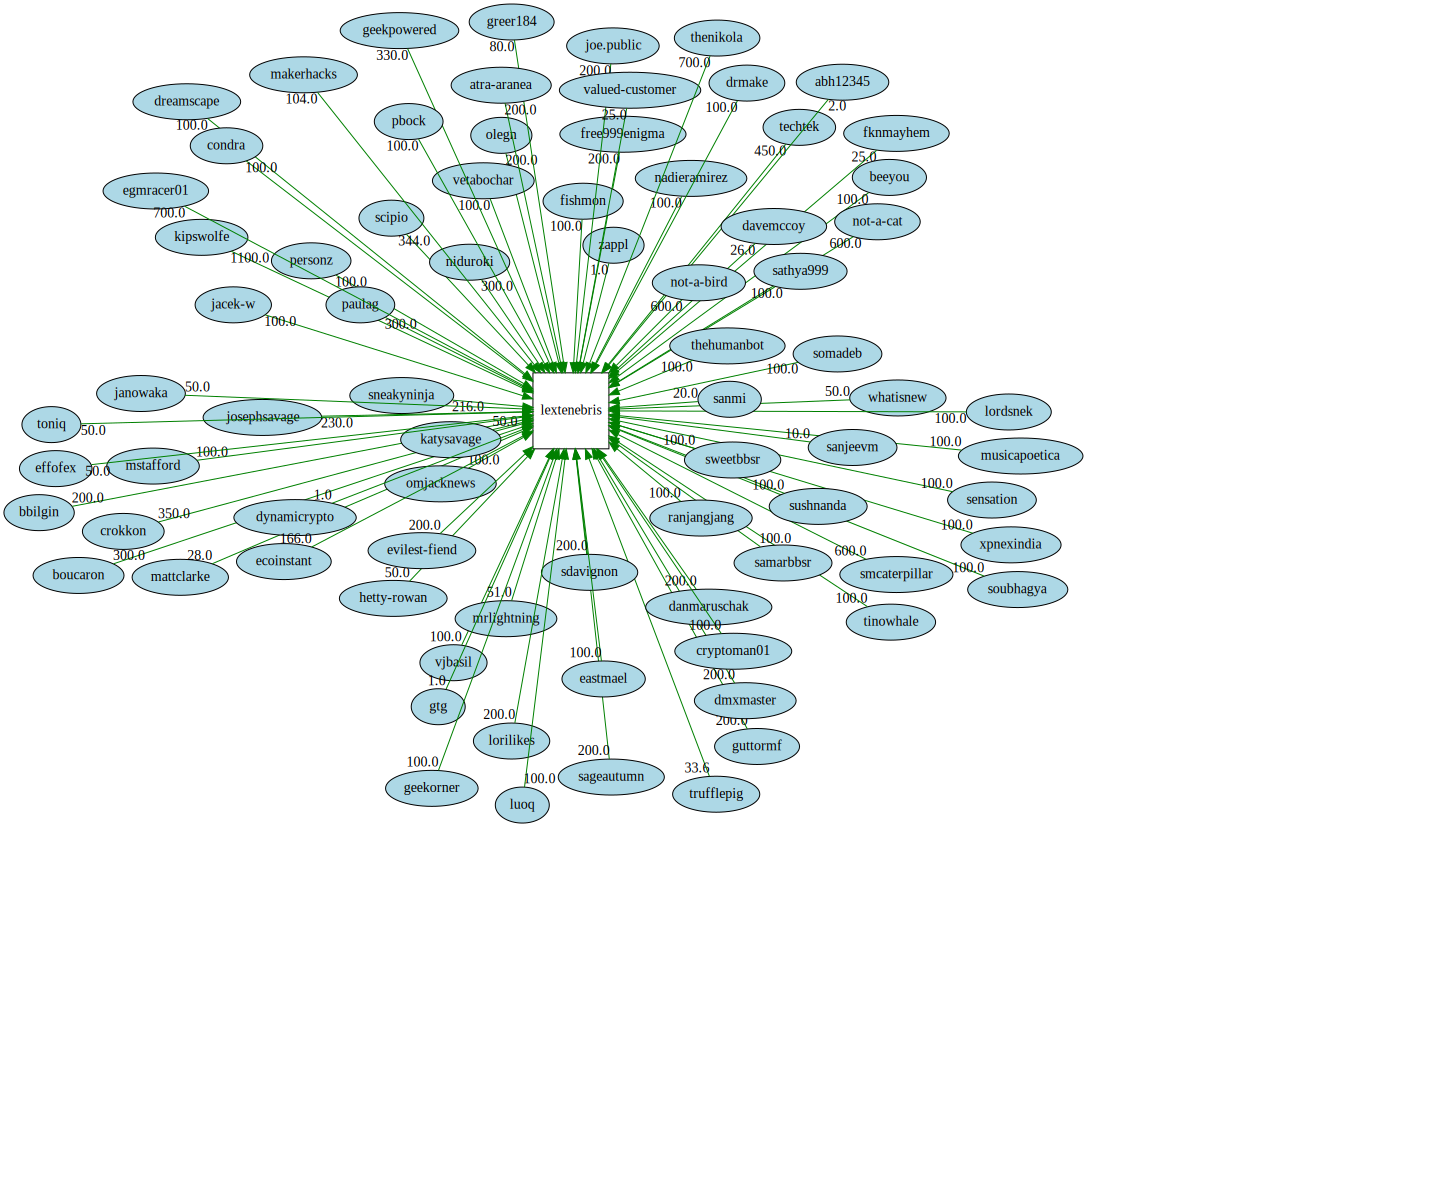

In [93]:
dot

Yes, I am really boring by comparison. Almost trivial to compute, given only a week of activity.

By the way, I would like to say thank you to everyone who has appeared on this graph for being good enough and kind enough to appreciate something I've done this week. I know it's been a weird week and I appreciate you sticking with me. Hopefully this post makes it all worthwhile.

You'll notice I have no flags (a fact which will probably change once this post goes live). I'm relatively proud of that.

What I really should do for normal people who interact on the platform and have normal human volumes of interaction is change the code so that votes are associated with whatever post or comment that they are made on. That will provide an automatic uniqueness measure because you can only vote once in one direction on any given post/comment. It won't provide as much of a feeling of aggregation, but it might be more useful.

Maybe I'll give that a try right now.

In [120]:
# Init connection to database

db = SteemData()

In [121]:
# Let's put our account on interest here in a list. One day
#   we might want to generalize to more than one.

intL =['lextenebris']

# We want only the vote transactions which have happened
#   in the last week AND involve only our accounts of interest. 

query = {
    'type' : 'vote',
    'timestamp' : {'$gte': dt.now() - datetime.timedelta(days=7)},
    '$or': [{'author': {'$in': intL}}
#           {'voter': {'$in': intL}}] 
           ]}

proj = {'voter': 1, 'author': 1, 'weight': 1, 'permlink': 1, '_id': 0}

In [122]:
%%time

result = db.Operations.find(query,
                            projection=proj)

voteLL = list(result)

Wall time: 314 ms


In [123]:
len(voteLL)

179

In [124]:
matchCount = 0

for e in voteLL:
    if e['voter'] == e['author']:
        matchCount += 1
        
matchCount

14

In [228]:
dot = Digraph(comment="Lex Vote Relations", 
              format="jpg",
              engine="neato")

In [229]:
dot.attr('graph', overlap='false')
dot.attr('graph', ratio='auto')
dot.attr('graph', size='10000000,10000000')
dot.attr('graph', start='1.0')
dot.attr('graph', K='10')
dot.attr('graph', margin='5')

In [230]:
dot.attr('node', shape='square', 
         style='filled', color='black', 
         fillcolor='white')

In [231]:
dot.node('lextenebris', 'lextenebris')

In [232]:
# Set up for posts/comment nodes

dot.attr('node', shape='rectangle', fillcolor='lightgrey')
# dot.attr('edge', color='lightgrey', len='10')
dot.attr('edge', color='lightgrey')

In [233]:
pstS = set()

for e in voteLL:
    pstS.add(e['permlink'])

In [234]:
for e in pstS:
    dot.node(e)
    dot.edge('lextenebris', e)

In [235]:
# Initialize our accumulators to be zeros for uninitalized queries

upvotes = DD(int)
downvotes = DD(int)

In [236]:
for v in voteLL:
    
    # We'll just use this tuple as a key for ease
    VA = v['voter'], v['author'], v['permlink']

    if not VA[0] == VA[1]:
        if v['weight'] >= 0:
            upvotes[VA] += v['weight']/100
        else:
            downvotes[VA] += (-v['weight'])/100

In [237]:
len(upvotes.keys()), len(downvotes.keys())

(165, 0)

In [238]:
totUpvotes = sum([upvotes[e] for e in upvotes.keys()])

totUpvotes

13393.6

In [239]:
totDownvotes = sum([downvotes[e] for e in downvotes.keys()])

totDownvotes

0

In [240]:
# Everyone upvoting me will get to be blue.

dot.attr('node', shape='oval', fontcolor='black', fillcolor='lightblue')

In [241]:
u = Digraph(name='Upvotes')

for v in upvotes.keys():
    u.edge(v[0], v[2], 
             color = 'green', 
             fontcolor = 'black',
#             len = str( ((totUpvotes / (upvotes[v]+0.0001)) + 1) * 100 ),
             taillabel = str(upvotes[v]))
    
dot.subgraph(u)

In [242]:
# Everyone downvoting Haelin will get to be yellow.

dot.attr('node', shape='oval', fillcolor='yellow')

In [243]:
d = Digraph(name='Downvotes')

for v in downvotes.keys():
    d.edge(v[0], v[2],
            color = 'red',
            fontcolor = 'red',
#            len = str( ((totDownvotes / (downvotes[v]+0.0001)) + 1) * 100 ),
            taillabel = str(downvotes[v]))
    
dot.subgraph(d)

In [244]:
%time dot.render('lexVotesWeek', view=True)

Wall time: 1.62 s


'lexVotesWeek.jpg'

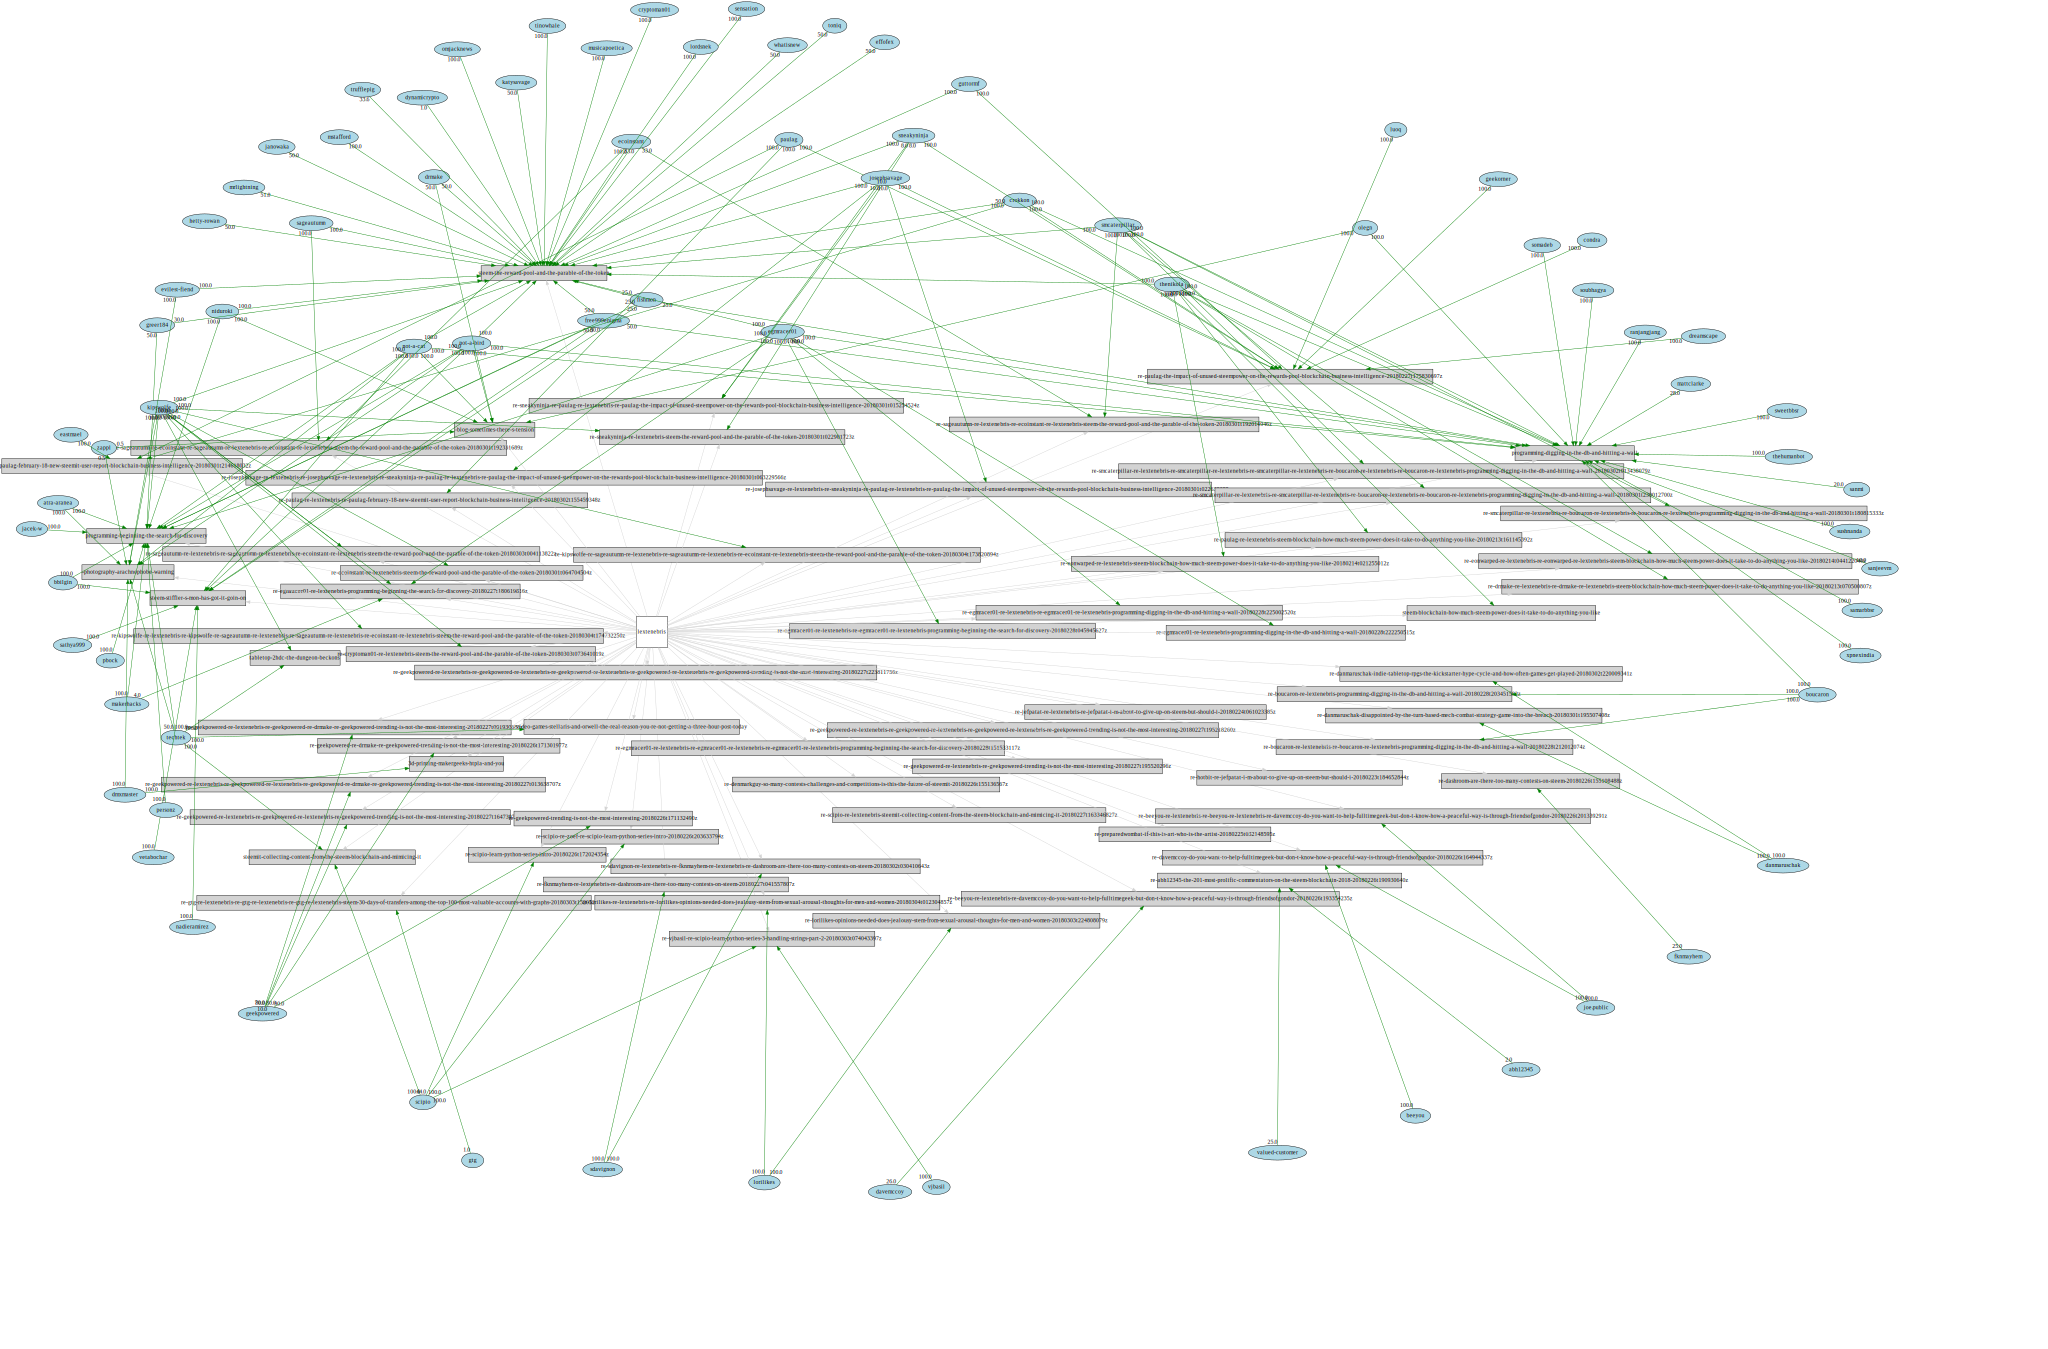

In [245]:
dot

Nothing really surprising here, truly. Well, except for a recognition that it is really hard to be able to show a proper link to a website in a readable, easily comprehensible form.

This graph is small enough that I could use one of the more fully featured graph renderers in graphviz and actually tweak the lengths of the paths – or more accurately, stop tweaking them to get a reasonable result. That's a particularly good thing.

What's there to say? I'm a lot less interesting than warring whales.

## *Epilogue*

We've seen some interesting things, dug up some interesting data, but I'm not sure that we've actually managed to explain anything. We may have turned up more questions than we have answered.

What's going on with Bernie this week and why has he been up voting Haejin for the first time in months, not with small up votes but with significant ones? What's up with the people who have both up voted and flagged Haejin? When will Haejin notice that the terrifying amount of SP he wastes flagging Bernie could be far more effectively used in self-loading (or voting for me, which I would prefer quite frankly, but I'm being open-minded)? When will they get a room, spend some private time together, and finally announce the engagement?

Honestly, I have way more questions than I have answers.

But at least we have the tools to discover that we have questions! That alone may take us far.

### Tools

* [Python 3.6](https://www.python.org/)
* [Jupyter Lab](https://github.com/jupyterlab/jupyterlab)
* [SteemData](https://steemdata.com/) created by @furion
* [MongoDB](https://www.mongodb.com/)
* [Graphviz](https://graphviz.gitlab.io/about/)

**And the support of viewers like you.**